# 🔸 Passo 1: Preparação dos dados


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# Selecionar as colunas relevantes
df_cluster = df[["player_champion", "player_lane", "player_kills", 
                 "player_deaths", "player_assists", "game_duration", 
                 "binary_win"]].copy()

# Remover valores nulos
df_cluster.dropna(inplace=True)

# Converter duração do jogo para inteiro
df_cluster["game_duration"] = df_cluster["game_duration"].apply(lambda x: int(x.replace(",", "")))

# Agregar dados por campeão e lane
df_group = df_cluster.groupby(["player_champion", "player_lane"]).agg({
    "player_kills": "mean",
    "player_deaths": "mean",
    "player_assists": "mean",
    "game_duration": "mean",
    "binary_win": "mean"
}).reset_index()

# Renomear colunas
df_group.rename(columns={
    "player_kills": "kills_media",
    "player_deaths": "deaths_media",
    "player_assists": "assists_media",
    "game_duration": "duracao_media",
    "binary_win": "taxa_vitoria"
}, inplace=True)

# Exibir dados prontos
print(df_group.head())

# Salvar dados preparados (opcional)
df_group.to_csv("dados_preparados_cluster.csv", index=False)


  player_champion player_lane  kills_media  deaths_media  assists_media  \
0          Aatrox      BOTTOM    19.000000     16.000000      10.000000   
1          Aatrox      JUNGLE     7.500000      6.368421       5.868421   
2          Aatrox      MIDDLE     6.733333      6.166667       5.500000   
3          Aatrox        NONE     2.549451      2.384615       1.417582   
4          Aatrox         TOP     6.568579      6.241895       5.137157   

   duracao_media  taxa_vitoria  
0    2438.000000      0.000000  
1    1497.118421      0.618421  
2    1472.666667      0.533333  
3     798.208791      0.516484  
4    1555.645885      0.483791  


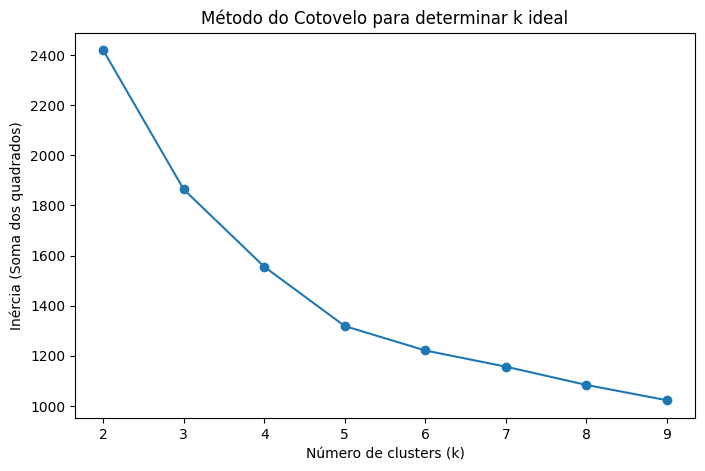

  player_champion player_lane  kills_media  deaths_media  assists_media  \
0          Aatrox      BOTTOM    19.000000     16.000000      10.000000   
1          Aatrox      JUNGLE     7.500000      6.368421       5.868421   
2          Aatrox      MIDDLE     6.733333      6.166667       5.500000   
3          Aatrox        NONE     2.549451      2.384615       1.417582   
4          Aatrox         TOP     6.568579      6.241895       5.137157   
5            Ahri      BOTTOM     7.000000      6.222222       7.888889   
6            Ahri      JUNGLE     7.000000      7.000000       5.750000   
7            Ahri      MIDDLE     6.770751      5.361660       7.867589   
8            Ahri        NONE     2.193277      1.957983       2.327731   
9            Ahri         TOP     7.714286      5.800000       8.628571   

   duracao_media  taxa_vitoria  cluster  
0    2438.000000      0.000000        1  
1    1497.118421      0.618421        1  
2    1472.666667      0.533333        1  
3     

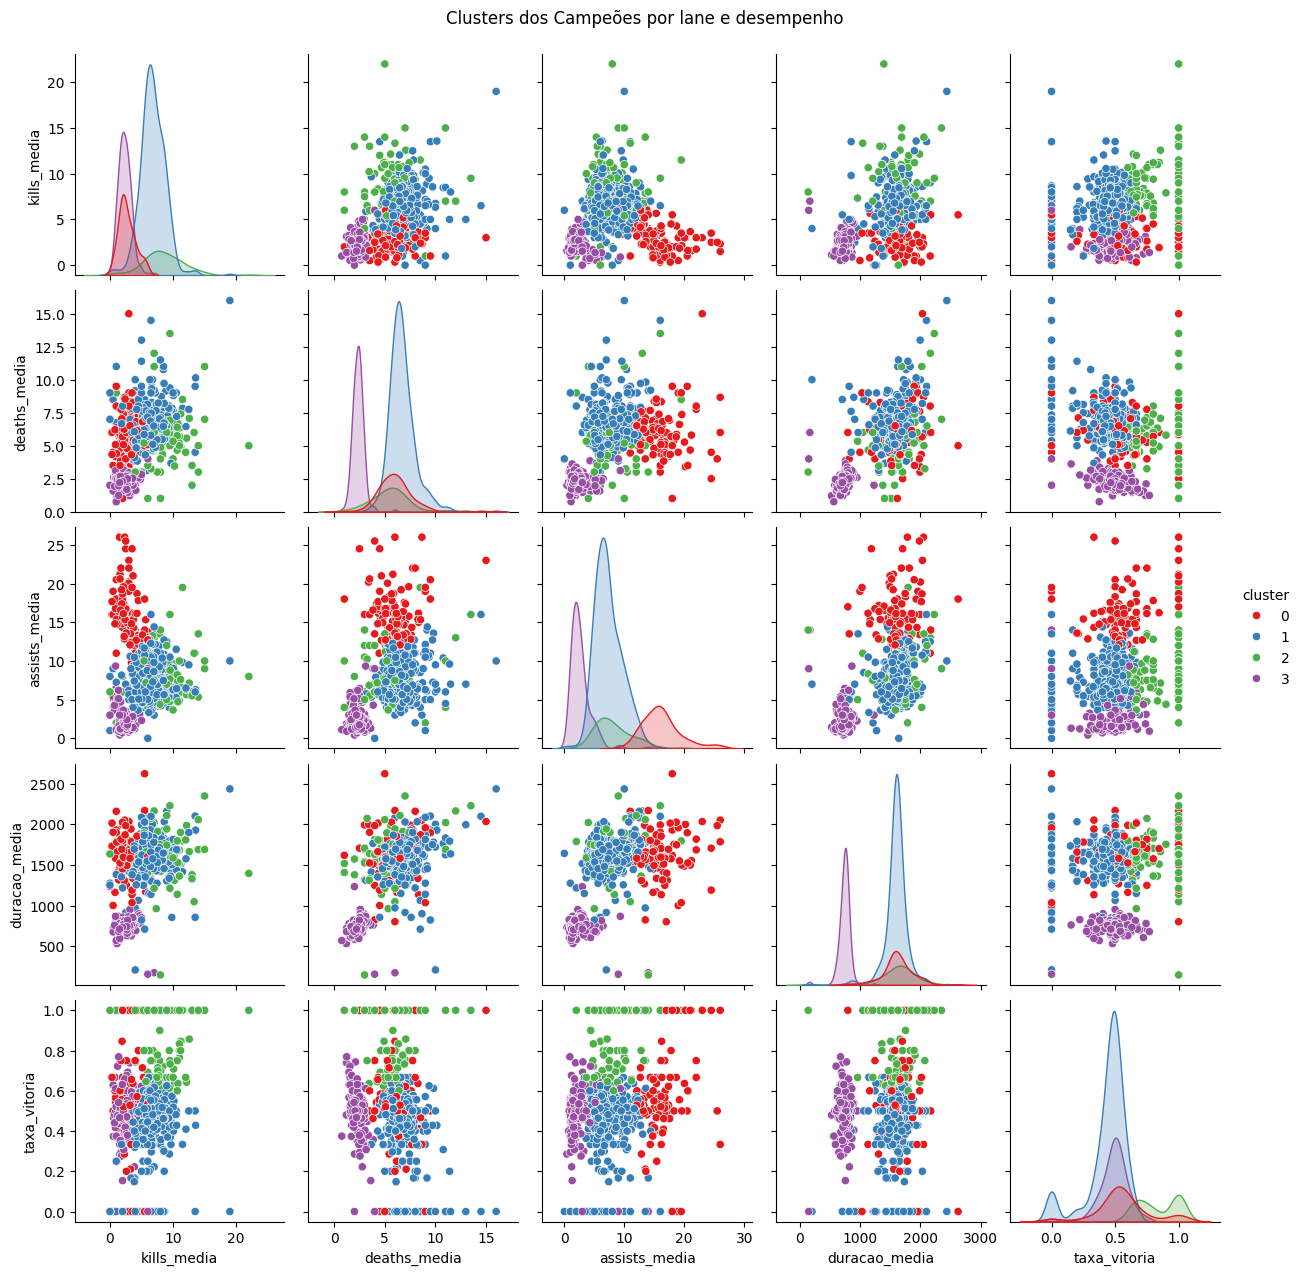

In [4]:
# Continuar da parte anterior ou carregar dados preparados
# df_group = pd.read_csv("dados_preparados_cluster.csv")

# Padronizar os dados numéricos
features = ["kills_media", "deaths_media", "assists_media", "duracao_media", "taxa_vitoria"]
X = df_group[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar número ideal de clusters com Elbow Method (opcional mas recomendado)
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inercias.append(kmeans.inertia_)

# Gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), inercias, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia (Soma dos quadrados)")
plt.title("Método do Cotovelo para determinar k ideal")
plt.show()

# Com base no gráfico escolha k (exemplo: 4)
k_ideal = 4

# Aplicar K-means com número ideal de clusters escolhido
kmeans = KMeans(n_clusters=k_ideal, random_state=42, n_init=10)
df_group["cluster"] = kmeans.fit_predict(X_scaled)

# Exibir resultado dos clusters
print(df_group.head(10))

# Visualizar clusters usando Pairplot
sns.pairplot(df_group, hue="cluster", vars=features, palette="Set1")
plt.suptitle("Clusters dos Campeões por lane e desempenho", y=1.02)
plt.show()

# Salvar resultado dos clusters
df_group.to_csv("resultado_clusters.csv", index=False)


In [5]:
import pandas as pd

# Carregar dados dos clusters já gerados
df_clusters = pd.read_csv("resultado_clusters.csv")

# Listar alguns exemplos concretos de campeões em cada cluster
exemplos_campeoes = df_clusters.groupby('cluster').apply(lambda x: x.sample(min(5, len(x)), random_state=42)).reset_index(drop=True)

# Salvar exemplos em CSV para referência posterior
exemplos_campeoes.to_csv("exemplos_campeoes_por_cluster.csv", index=False)

exemplos_campeoes


,player_champion,player_lane,kills_media,deaths_media,assists_media,duracao_media,taxa_vitoria,cluster
0,Senna,TOP,4.500000,5.700000,17.800000,1576.100000,0.800000,0
1,Aurora,BOTTOM,1.000000,8.000000,11.000000,2162.000000,1.000000,0
2,Maokai,MIDDLE,4.285714,5.857143,18.714286,1748.428571,1.000000,0
3,Rell,MIDDLE,2.136364,7.363636,19.590909,1499.500000,0.500000,0
4,Blitzcrank,TOP,2.400000,7.600000,13.400000,1989.000000,0.600000,0
5,Zilean,JUNGLE,0.000000,7.000000,8.000000,1252.000000,0.000000,1
6,Draven,TOP,8.533333,7.066667,5.933333,1616.600000,0.400000,1
7,Leblanc,BOTTOM,8.600000,7.000000,7.800000,1718.600000,0.400000,1
8,AurelionSol,MIDDLE,7.484375,5.804688,8.398438,1640.015625,0.500000,1
9,Varus,TOP,7.370370,8.148148,6.407407,1427.407407,0.555556,1


# Detectar Outlier

In [7]:
import pandas as pd
from scipy.stats import zscore

# Carregar os dados
df_clusters = pd.read_csv("resultado_clusters.csv")

# Calcular z-score para identificar outliers numéricos por cluster
cols_numericas = ['kills_media', 'deaths_media', 'assists_media', 'duracao_media', 'taxa_vitoria']
df_clusters['zscore'] = df_clusters.groupby('cluster')[cols_numericas].transform(lambda x: zscore(x, ddof=1)).abs().mean(axis=1)

# Definir um limiar para identificar outliers claros (z-score médio maior que 2, por exemplo)
outliers = df_clusters[df_clusters['zscore'] > 2]

# Exibir resultados claramente identificados como outliers
print("\n📌 Campeões Outliers Detectados:")
print(outliers[['player_champion', 'player_lane', 'cluster', 'zscore']])

# Salvar resultado em um CSV
outliers.to_csv("campeoes_outliers.csv", index=False)



📌 Campeões Outliers Detectados:
    player_champion player_lane  cluster    zscore
0            Aatrox      BOTTOM        1  4.290716
86            Briar      BOTTOM        1  2.526565
114          Darius      BOTTOM        1  2.195448
143           Elise         TOP        3  5.509145
153    FiddleSticks      MIDDLE        1  2.132472
166           Galio      JUNGLE        1  2.164835
397         Naafiri      BOTTOM        1  2.202754
436            Nunu      BOTTOM        1  3.033501
440            Nunu         TOP        1  2.485248
483          Rammus      BOTTOM        0  2.269128
630           Taric         TOP        1  2.114497
651      Tryndamere      BOTTOM        3  2.437335
702              Vi         TOP        1  2.192013
737         XinZhao      BOTTOM        1  2.843908
757           Yuumi      JUNGLE        3  4.059567


In [9]:
import pandas as pd

# Carregar dados originais
df = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# Filtrar partidas específicas muito curtas (menos de 5 minutos)
partidas_curtas = df[df["game_duration"].apply(lambda x: int(x.replace(",", "")) < 300)]

# Buscar Elise TOP e Yuumi JUNGLE
partidas_elise_yuumi = partidas_curtas[
    ((partidas_curtas["player_champion"] == "Elise") & (partidas_curtas["player_lane"] == "TOP")) |
    ((partidas_curtas["player_champion"] == "Yuumi") & (partidas_curtas["player_lane"] == "JUNGLE"))
]

# Salvar em CSV para análise
partidas_elise_yuumi.to_csv("partidas_elise_yuumi_curtas.csv", index=False)

partidas_elise_yuumi.head()


,match_id,player_summoner_id,player_champion,binary_win,win,player_team,player_lane,player_role,player_position,game_duration,...,team1_champion3,team1_champion4,team1_champion5,team2_champion1,team2_champion2,team2_champion3,team2_champion4,team2_champion5,Coluna 1,Coluna 2
21236,BR1_2995660037,TjACZSczN45R2KX0oV9OEbvk4VKd6gjhphRJGCTCgT5nJ2c,Elise,0,No,team2,TOP,SUPPORT,NONE,"1,71",...,Yasuo,Kaisa,Blitzcrank,Riven,Elise,Leblanc,MissFortune,Thresh,NaN,NaN
37447,BR1_3039799042,ma4FVx9uKi70veY_rfgemEXMvzsf6_tk_S98nSdy92RdN7w,Yuumi,0,No,team2,JUNGLE,NONE,JUNGLE,"1,53",...,Jayce,Aphelios,Nami,KSante,Nocturne,Ziggs,Swain,Yuumi,NaN,NaN


In [10]:
# Campeões que aparecem em lanes incomuns
escolhas_atipicas = ["Briar", "Darius", "FiddleSticks", "Galio", "Naafiri", "Nunu", "Taric", "Tryndamere", "Vi", "XinZhao"]
lanes_atipicas = ["BOTTOM", "TOP", "MIDDLE", "JUNGLE"]

# Filtrando escolhas atípicas
escolhas_atipicas_df = df[
    df["player_champion"].isin(escolhas_atipicas) & df["player_lane"].isin(lanes_atipicas)
]

# Agrupar por campeão e lane para verificar frequência e desempenho
resultado_escolhas_atipicas = escolhas_atipicas_df.groupby(["player_champion", "player_lane"]).agg(
    partidas=("match_id", "count"),
    taxa_vitoria_media=("binary_win", "mean"),
    kills_media=("player_kills", "mean"),
    deaths_media=("player_deaths", "mean"),
    assists_media=("player_assists", "mean"),
    duracao_media=("game_duration", lambda x: pd.to_numeric(x.str.replace(",", "")).mean())
).reset_index()

resultado_escolhas_atipicas.to_csv("resultado_escolhas_atipicas.csv", index=False)

resultado_escolhas_atipicas.head(10)


,player_champion,player_lane,partidas,taxa_vitoria_media,kills_media,deaths_media,assists_media,duracao_media
0,Briar,BOTTOM,2,0.000000,13.500000,9.500000,11.000000,2103.500000
1,Briar,JUNGLE,82,0.475610,8.146341,7.695122,8.670732,1670.195122
2,Darius,BOTTOM,3,0.000000,4.666667,8.666667,3.000000,898.666667
3,Darius,JUNGLE,61,0.475410,7.262295,6.065574,4.016393,1678.770492
4,Darius,MIDDLE,24,0.583333,8.083333,6.166667,4.250000,1598.291667
5,Darius,TOP,225,0.462222,6.706667,6.706667,4.324444,1566.035556
6,FiddleSticks,BOTTOM,6,0.166667,3.833333,8.000000,11.000000,1582.500000
7,FiddleSticks,JUNGLE,105,0.542857,5.980952,5.885714,10.019048,1573.523810
8,FiddleSticks,MIDDLE,1,0.000000,5.000000,13.000000,7.000000,1996.000000
9,FiddleSticks,TOP,1,1.000000,4.000000,3.000000,6.000000,1317.000000


# Análise da relação entre clusters e taxas de vitória por lane

In [16]:
import pandas as pd

# Carregar o arquivo que contém os clusters
df = pd.read_csv("resultado_clusters.csv")

# Conferir nomes das colunas
print(df.columns)

# Garantir que os nomes estão limpos
df.columns = df.columns.str.strip()

# Agrupar por cluster e lane
analise_cluster_lane = df.groupby(["cluster", "player_lane"])["taxa_vitoria"].mean().reset_index()

# Pivotar para facilitar leitura
pivot_cluster_lane = analise_cluster_lane.pivot(index="player_lane", columns="cluster", values="taxa_vitoria")

# Exibir e salvar
print("\n📌 Taxa de Vitória Média por Cluster e Lane:")
print(pivot_cluster_lane)

pivot_cluster_lane.to_csv("taxa_vitoria_cluster_por_lane.csv")


Index(['player_champion', 'player_lane', 'kills_media', 'deaths_media',
       'assists_media', 'duracao_media', 'taxa_vitoria', 'cluster'],
      dtype='object')

📌 Taxa de Vitória Média por Cluster e Lane:
cluster             0         1         2         3
player_lane                                        
BOTTOM       0.539548  0.399040  0.944167  0.000000
JUNGLE       0.538293  0.466437  0.867446  0.000000
MIDDLE       0.570440  0.442645  0.757565       NaN
NONE              NaN       NaN       NaN  0.495626
TOP          0.598746  0.439288  0.779286  0.000000
